In [97]:
from scipy.stats import gamma, norm, beta
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

## Gamma distribution

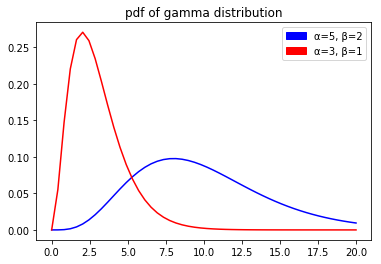

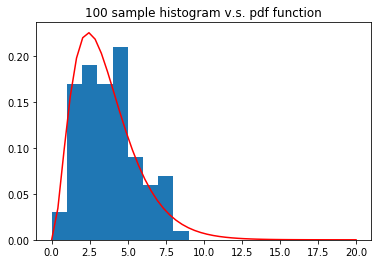

In [95]:
x = np.linspace(0, 20, 50)

plt.figure(figsize=(6,4))
plt.plot(x, gamma.pdf(x, a=5, scale=2), 'b-')
plt.plot(x, gamma.pdf(x, a=3, scale=1), 'r-')
plt.title("pdf of gamma distribution")
function_1 = mpatches.Patch(color='b', label="α=5, β=2")
function_2 = mpatches.Patch(color='r', label="α=3, β=1")
plt.legend(handles=[function_1, function_2])
plt.show()

plt.hist(gamma.rvs(a=3, scale=1.2, size=100), density=True, bins=list(range(0, 20)))
plt.plot(x, gamma.pdf(x, a=3, scale=1.2), 'r-')
plt.title("100 sample histogram v.s. pdf function")
plt.show()

#### Normal distribution

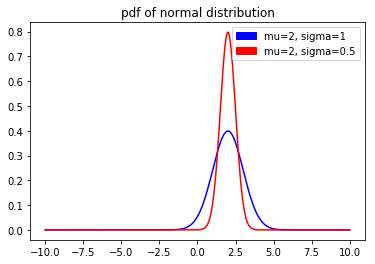

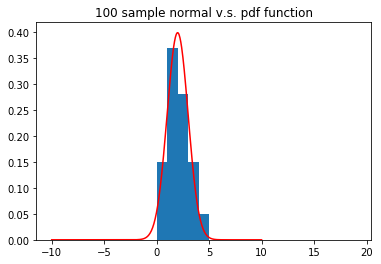

In [69]:
x = np.linspace(-10, 10, 500)

plt.figure(figsize=(6,4))
plt.plot(x, norm.pdf(x, loc=2, scale=1), 'b-')
plt.plot(x, norm.pdf(x, loc=2, scale=0.5), 'r-')
plt.title("pdf of normal distribution")
function_1 = mpatches.Patch(color='b', label="mu=2, sigma=1")
function_2 = mpatches.Patch(color='r', label="mu=2, sigma=0.5")
plt.legend(handles=[function_1, function_2])
plt.show()

plt.hist(norm.rvs(loc=2, scale=1, size=100), density=True, bins=list(range(0, 20)))
plt.plot(x, norm.pdf(x, loc=2, scale=1), 'r-')
plt.title("100 sample normal v.s. pdf function")
plt.show()

## Beta distribution

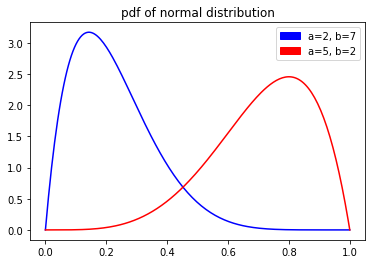

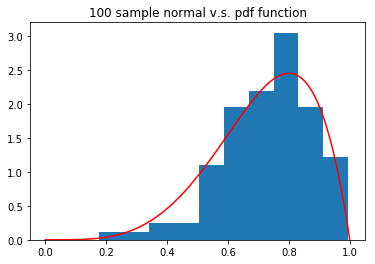

In [72]:
x = np.linspace(0, 1, 200)

plt.figure(figsize=(6,4))
plt.plot(x, beta.pdf(x, a=2, b=7), 'b-')
plt.plot(x, beta.pdf(x, a=5, b=2), 'r-')
plt.title("pdf of normal distribution")
function_1 = mpatches.Patch(color='b', label="a=2, b=7")
function_2 = mpatches.Patch(color='r', label="a=5, b=2")
plt.legend(handles=[function_1, function_2])
plt.show()

plt.hist(beta.rvs(a=5, b=2, size=100), density=True, bins=10)
plt.plot(x, beta.pdf(x, a=5, b=2), 'r-')
plt.title("100 sample normal v.s. pdf function")
plt.show()

## Call center data modeling


In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [75]:
# Load the data set containing durations between calls arriving at the call center.
# All values are in minutes.
waiting_times_day = np.loadtxt('/Users/qiusuwang/Desktop/call_center.csv')


print('Size of data set:', len(waiting_times_day))
print('First 3 values in data set:', waiting_times_day[:3])
print('Sum of data set:', sum(waiting_times_day))

Size of data set: 5891
First 3 values in data set: [5.36 2.48 8.08]
Sum of data set: 1442.145437310004


Since the values are intervals between calls measured in minutes, this means

we assume the first call happened at 00:00 (midnight),
the second call happened at about 00:05 (5.36 minutes after midnight),
the third call happened at about 00:07 (5.36 + 2.48 minutes),
the fourth call happened at about 00:15, etc.
When we sum the values, we get about 1440 minutes (1 day).

You are told that the number of calls arriving varies quite a lot, depending on which hour of the day it is. The smallest number of calls usually occur around 3am or 4am. Most calls usually come in between 11am and 1pm.

## Data pre-processing
Since we expect different call rates during different hours, we split the data set into 24 separate series — one for each hour of the day.

In [76]:
# Split the data into 24 separate series, one for each hour of the day# Split 
current_time = 0
waiting_times_per_hour = [[] for _ in range(24)]  # Make 24 empty lists, one per hour
for t in waiting_times_day:
    current_hour = int(current_time // 60)
    current_time += t
    waiting_times_per_hour[current_hour].append(t)

for hour, waiting_times_hour in enumerate(waiting_times_per_hour):
    print('%02i:00-%02i:00 - %i calls' % (hour, hour + 1, len(waiting_times_hour)))

00:00-01:00 - 7 calls
01:00-02:00 - 5 calls
02:00-03:00 - 8 calls
03:00-04:00 - 7 calls
04:00-05:00 - 21 calls
05:00-06:00 - 42 calls
06:00-07:00 - 96 calls
07:00-08:00 - 189 calls
08:00-09:00 - 274 calls
09:00-10:00 - 344 calls
10:00-11:00 - 487 calls
11:00-12:00 - 892 calls
12:00-13:00 - 869 calls
13:00-14:00 - 401 calls
14:00-15:00 - 206 calls
15:00-16:00 - 169 calls
16:00-17:00 - 261 calls
17:00-18:00 - 430 calls
18:00-19:00 - 579 calls
19:00-20:00 - 383 calls
20:00-21:00 - 136 calls
21:00-22:00 - 45 calls
22:00-23:00 - 28 calls
23:00-24:00 - 12 calls


## Task 1: Plot the number of calls per hour
Use Matplotlib to visualize the number of calls that arrive during each hour of the day. The numbers are shown in the output above. You should find an appropriate way to visualize it.

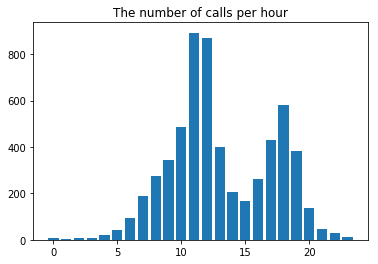

In [82]:
number_of_call_per_hour = [len(i) for i in waiting_times_per_hour]
plt.bar(list(range(0,24)), number_of_call_per_hour)
plt.title("The number of calls per hour")
plt.show()


## Task 2: Plot a histogram of the durations for one hour
Take the data for the 11th hour (so between 11am and 12pm) and plot a histogram showing the distribution over waiting times between calls during that hour.

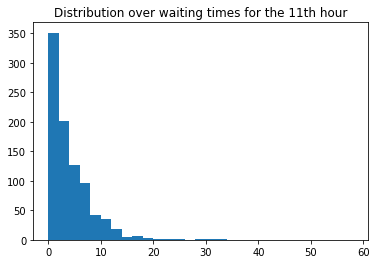

In [89]:
plt.hist([i*60 for i in waiting_times_per_hour[11]], bins=list(range(0,60,2)))
plt.title("Distribution over waiting times for the 11th hour")
plt.show()

## Task 3: Guess the distribution
What type of distribution best represents the data in your histogram?

Identify a type of distribution.
Guess what the parameters of the distribution are.
Plot the pdf of your best guess on top of your histogram, to see if they match.
Important: you have to normalize your histogram so that it will have the same vertical scale as the plot of the pdf. You can normalize a histogram by using the argument density=True in the hist function.

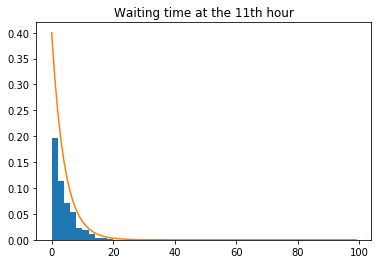

In [93]:
from scipy.stats import expon

#time
x = np.linspace(0, 60, 100)

plt.hist([i*60 for i in waiting_times_per_hour[11]], density=True, bins=list(range(0,60,2)))
plt.plot(expon.pdf(x, scale=2.5))
plt.title("Waiting time at the 11th hour")
plt.show()